In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Action Space
actions = (
    (-1, 0),  # UP
    (1, 0),   # DOWN
    (0, -1),  # LEFT
    (0, 1)    # RIGHT
)

def is_terminal(state, grid_size=4):
    return state in ((0, 0), (grid_size - 1, grid_size - 1))


def step(state, action, grid_size=4, reward=-1):
    """
    Returns next state and reward given a current state and an action.
    """
    
    if is_terminal(state, grid_size=grid_size):
        return state, 0
    
    x, y = state
    dx, dy = action
    x = np.clip(x + dx, 0, grid_size - 1)
    y = np.clip(y + dy, 0, grid_size - 1)
    state = (x, y)
    
    return state, reward

# Policy Evaluation Loop

## Bellman Expectation Equation
$$V_{k+1}(s) = \sum_{a \in A}{\pi(a|s)} \left[ R(s, a) + \gamma \sum_{s^{'} \in S} P(s'|s, a) V_{k}(s^{'}) \right]$$

In [3]:
def policy_evaluation(actions, reward=-1, gamma=1.0, grid_size=4, theta=1e-4):
    """
    Runs a policy evaluation iteration.
    Epsilon-convergence is used to halt iterations.
    """

    # Initialize state value function to all zeros
    state_value_function = np.zeros((grid_size, grid_size))
    
    while True:
        delta = 0

        # synch backup
        new_state_value_function = np.copy(state_value_function)
        
        for i in range(grid_size):
            for j in range(grid_size):
                state = (i, j)
                
                if is_terminal(state, grid_size=grid_size):
                    continue
                
                # evaluate all possible actions from current state
                # i.e. policy: uniform random policy
                state_value = 0
                for action in actions:
                    next_state, reward = step(state, action, grid_size=grid_size, reward=reward)

                    # Uniform random policy: π = 1/|A|, for all actions
                    # Bellman expectation equation
                    state_value += (1 / len(actions)) * (reward + gamma * state_value_function[next_state])
                
                new_state_value_function[i, j] = state_value

                # how much we improved
                delta = max(delta, abs(state_value_function[i, j] - state_value))
        
        state_value_function = new_state_value_function
        
        if delta < theta:
            break

    return state_value_function


def recover_greedy_policy(state_value_function, gamma=1.0):
    """
    Recovers a deterministic policy given a state value function.
    """

    grid_size = state_value_function.shape[0]
    
    policy = np.full((grid_size, grid_size), None)
    for i in range(grid_size):
        for j in range(grid_size):
            if is_terminal((i, j)):
                continue
            
            best_action = None
            best_value = float('-inf')
            for action in actions:
                next_state, reward = step((i, j), action)
                value = reward + gamma * state_value_function[next_state]
                if value > best_value:
                    best_value = value
                    best_action = action
            
            policy[i, j] = best_action
    
    return policy

### Plot functions

In [4]:
def plot_value_function(V, size=4):
    plt.figure(figsize=(6, 6))
    plt.imshow(V, cmap='coolwarm', interpolation='nearest')
    for i in range(size):
        for j in range(size):
            plt.text(j, i, f"{V[i, j]:.1f}", ha='center', va='center', color='black')
    plt.title(f"State Value Function of Random Uniform Policy")
    plt.show()


def plot_policy(policy):
    """
    Plots a given policy
    """

    grid_size = policy.shape[0]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(-0.5, grid_size - 0.5)
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticks(np.arange(grid_size) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid_size) - 0.5, minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=3)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    
    action_arrows = {(-1, 0): "↑", (1, 0): "↓", (0, -1): "←", (0, 1): "→"}
    for i in range(grid_size):
        for j in range(grid_size):
            if is_terminal((i, j)):
                ax.text(j, grid_size - 1 - i, "T", ha='center', va='center', fontsize=20, fontweight='bold')
            else:
                action = policy[i, j]
                if action:
                    ax.text(j, grid_size - 1 - i, action_arrows[action], ha='center', va='center', fontsize=20)

    plt.title(f"Greedy policy improvement")
    plt.show()

# Policy Evaluation step

Given the random uniform policy, recover the corresponding state value function.

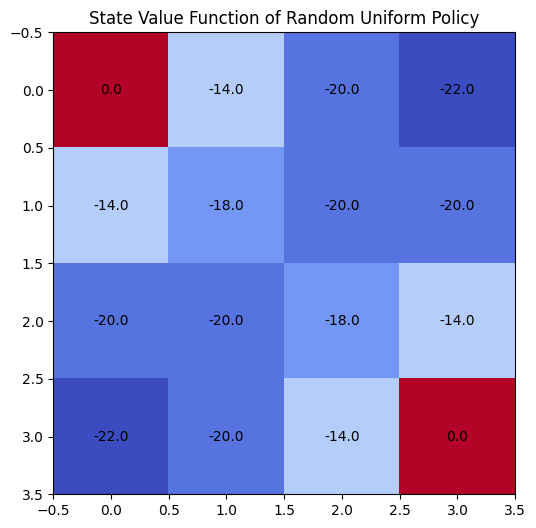

In [5]:
state_value_function = policy_evaluation(actions)
plot_value_function(state_value_function)

# Greedy Policy Improvement

Let's do one step of greedy (deterministic) policy improvement from the recovered state value function.
The new policy (in this special example) will be the optimal (deterministic) policy.

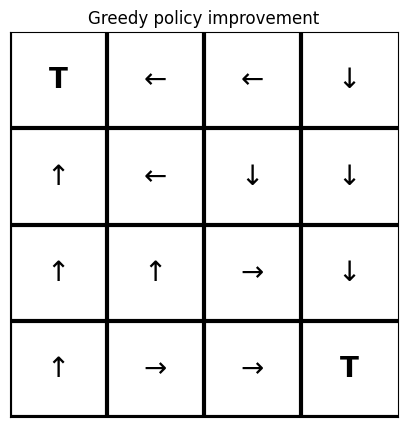

In [6]:
new_greedy_policy = recover_greedy_policy(state_value_function)
plot_policy(new_greedy_policy)